Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_us = pd.read_csv("D:/Spyder/Data-Envelopment-Analysis-Excel/Data/US_police_Shooting/shootings.csv")

In [3]:
df_us

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,5916,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,5925,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4892,5918,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,5921,William Slyter,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns


# Basic Information

In [4]:
def basic_info(data):
    print(data.shape)
    print(data.size)
    print(data.info())
    cat, num = list(), list()
    for i in data.columns:
        if data[i].dtype == object:
            cat.append(i)
        else:
            num.append(i)
    print(cat, "\n")
    print(num)
    return cat, num

In [5]:
categorical, numerical = basic_info(df_us)

(4895, 15)
73425
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4895 non-null   int64  
 1   name                     4895 non-null   object 
 2   date                     4895 non-null   object 
 3   manner_of_death          4895 non-null   object 
 4   armed                    4895 non-null   object 
 5   age                      4895 non-null   float64
 6   gender                   4895 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     4895 non-null   object 
 9   state                    4895 non-null   object 
 10  signs_of_mental_illness  4895 non-null   bool   
 11  threat_level             4895 non-null   object 
 12  flee                     4895 non-null   object 
 13  body_camera              4895 non-null   bool   
 14  arms_ca

In [6]:
df_us2 = df_us.sort_values(by = ['id'])

In [7]:
df_us2

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4782,5917,Joshua Johnson,2020-04-22,shot,toy weapon,35.0,M,Black,Houston,TX,False,attack,Foot,False,Other unusual objects
4892,5918,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,5921,William Slyter,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns
4894,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,White,Lawrence,KS,False,attack,Car,False,Guns


In [8]:
df_us2['date'] = pd.to_datetime(df_us2['date'])

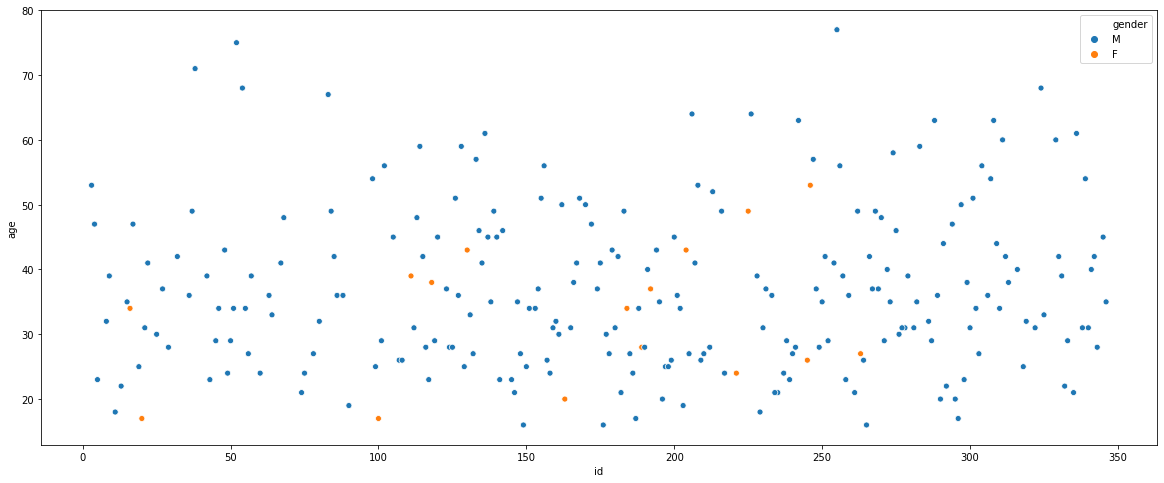

In [9]:
plt.figure(figsize=(20,8))
sns.scatterplot(df_us2['id'][:250], df_us2['age'][:250], hue= df_us2['gender'])

In [10]:
df_us2.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
arms_category              0
dtype: int64

# Basic Exploration

### manner_of_death

In [11]:
df_us2['manner_of_death'].value_counts()

shot                4647
shot and Tasered     248
Name: manner_of_death, dtype: int64

#### Lets see this in the form of a pie chart

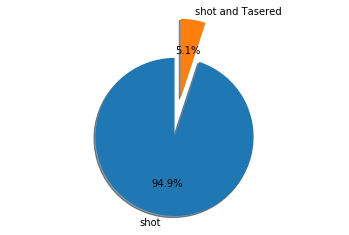

In [12]:
labels = df_us2['manner_of_death'].value_counts().index.tolist()
sizes = df_us2['manner_of_death'].value_counts()
explot = (0, 0.5)
fig, ax = plt.subplots()
ax.pie(sizes, labels = labels, explode = explot, autopct = "%1.1f%%", shadow=True, startangle=90)
ax.axis('equal')
plt.show()

We See that 95% of the population was shot directly

### armed

In [13]:
df_us2['armed'].value_counts()

gun               2755
knife              708
unknown            418
unarmed            348
toy weapon         171
                  ... 
stapler              1
bayonet              1
cordless drill       1
grenade              1
flagpole             1
Name: armed, Length: 89, dtype: int64

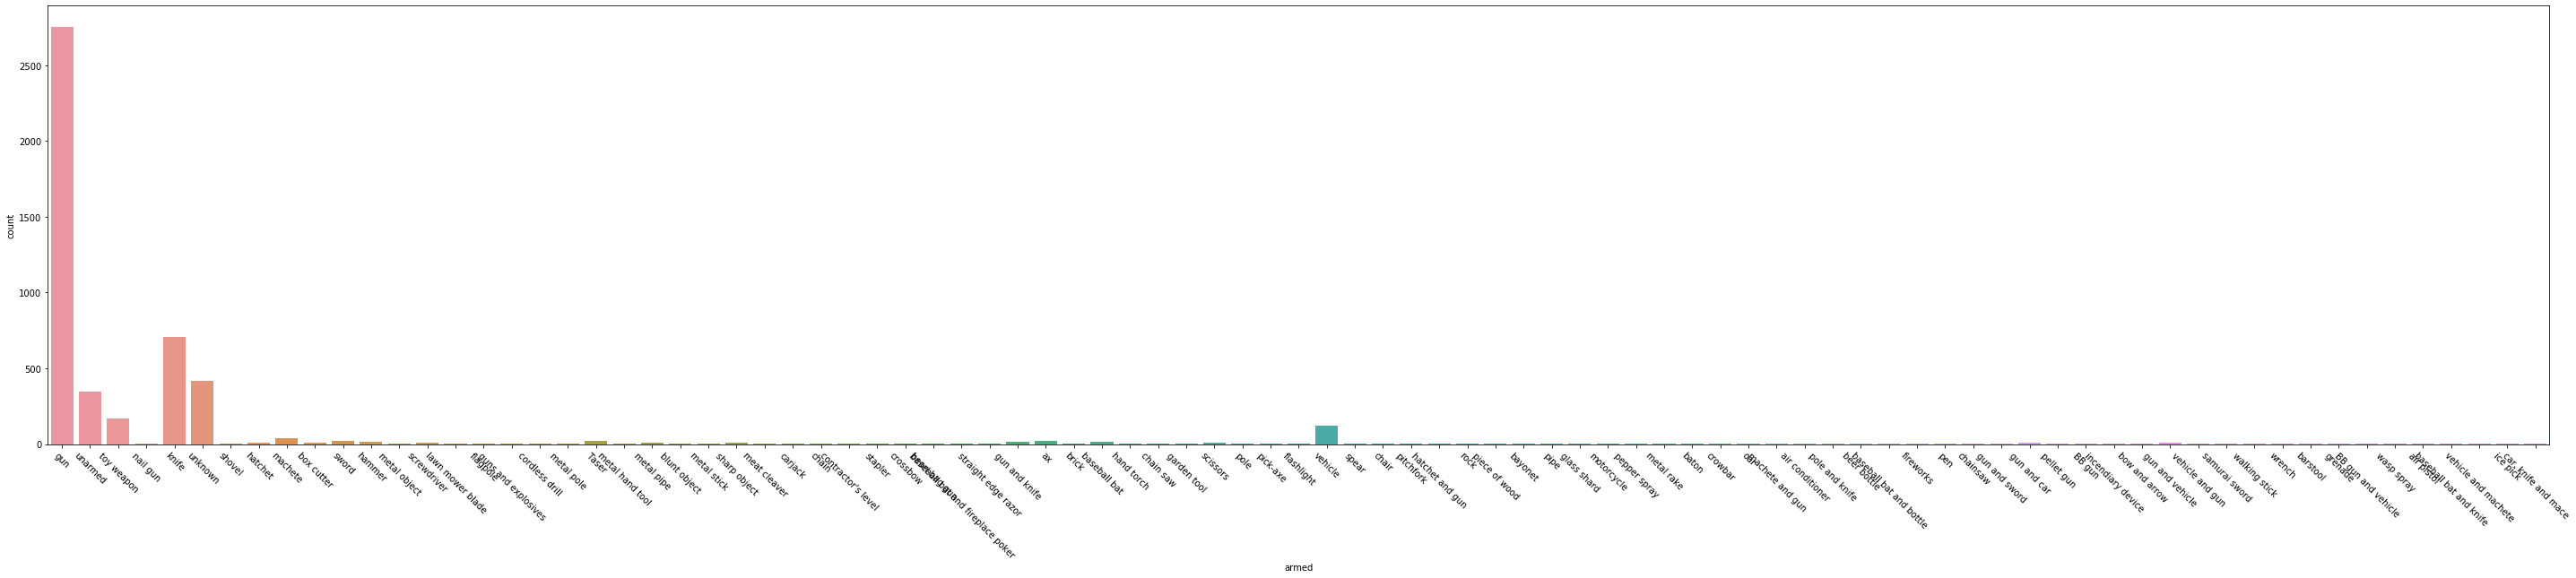

In [14]:
plt.figure(figsize=(50,9))
sns.countplot(df_us2['armed'])
plt.xticks(rotation = -45)
plt.show()

We can see that most of the people used Guns

### age

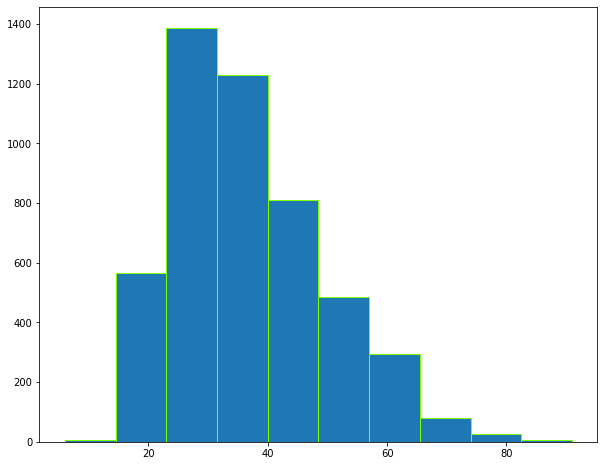

In [15]:
plt.figure(figsize=(10,8))
plt.hist(df_us2['age'], edgecolor = "#7FFF00")
plt.show()

we can see that most of the people who died were of the age b/w 22 to 40

### gender

In [16]:
df_us2['gender'].value_counts()

M    4673
F     222
Name: gender, dtype: int64

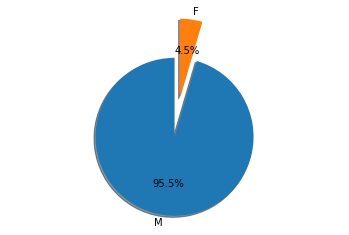

In [17]:
labels = df_us2['gender'].value_counts().index.tolist()
sizes = df_us2['gender'].value_counts()
explot = (0, 0.5)
fig, ax = plt.subplots()
ax.pie(sizes, labels = labels, explode = explot, autopct = "%1.1f%%", shadow=True, startangle=90)
ax.axis('equal')
plt.show()

Among the population that dies, 95.5% of them were men

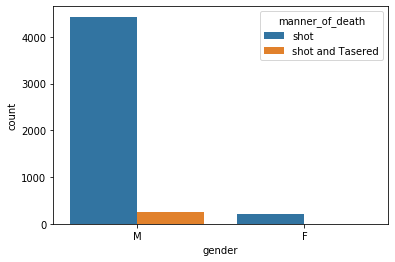

In [18]:
sns.countplot(df_us2['gender'], hue=df_us2['manner_of_death'])

We see that how many males and females were shot or shot & tasered

# race

In [19]:
df_us2['race'].value_counts()

White       2476
Black       1298
Hispanic     902
Asian         93
Native        78
Other         48
Name: race, dtype: int64

Rectangle(xy=(-0.4, 0), width=0.8, height=93, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=2476, angle=0)
Rectangle(xy=(1.6, 0), width=0.8, height=902, angle=0)
Rectangle(xy=(2.6, 0), width=0.8, height=1298, angle=0)
Rectangle(xy=(3.6, 0), width=0.8, height=48, angle=0)
Rectangle(xy=(4.6, 0), width=0.8, height=78, angle=0)


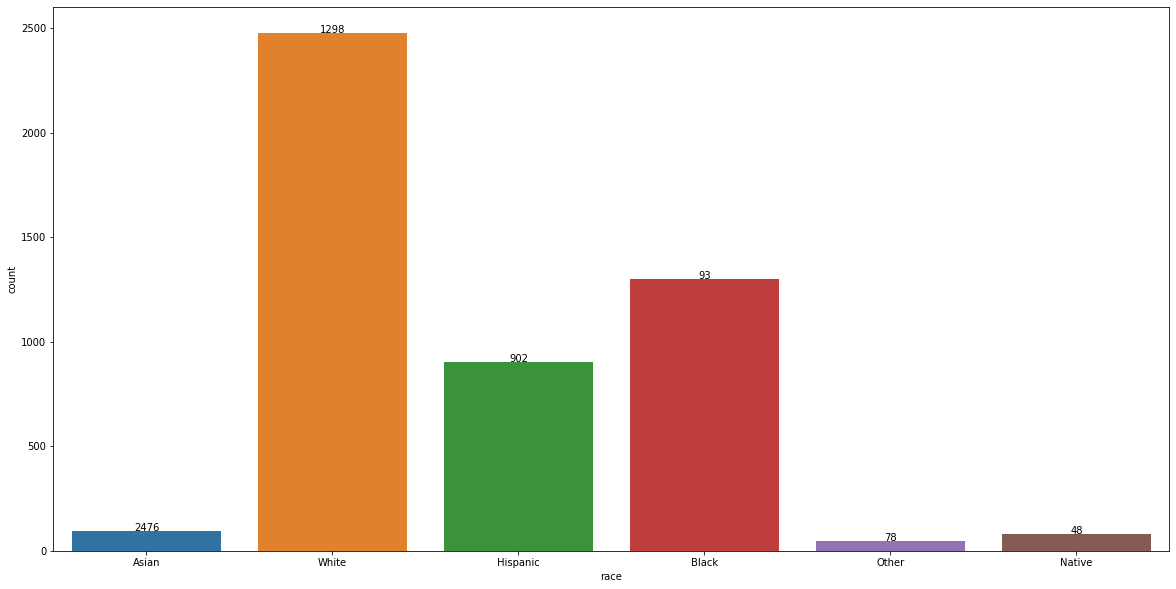

In [20]:
fig, ax = plt.subplots(figsize=(20,10))
graph = sns.countplot(ax = ax, x = 'race', data = df_us2)
i=0
for p in graph.patches:
    print(p)
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        df_us2['race'].value_counts()[i],ha="center")
    i += 1

#### Lets see how in each race, how many were men or women

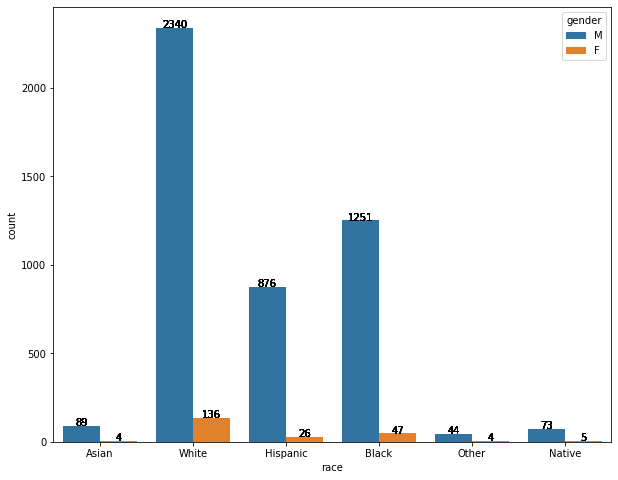

In [21]:
fig, ax = plt.subplots(figsize = (10,8))
#sns.countplot(df_us2['race'], hue= df_us2['gender'])
graph = sns.countplot(df_us2['race'], hue = df_us2['gender'])
for p in graph.patches:
    for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

#### Lets see race wtr to mannar of death

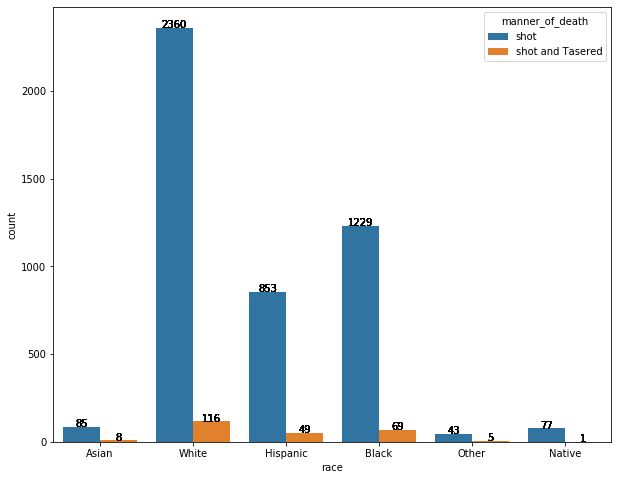

In [22]:
plt.figure(figsize=(10,8))
graph = sns.countplot(df_us2['race'], hue = df_us2['manner_of_death'])
for p in graph.patches:
    for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.3,height ,ha="center")

### state

In [23]:
df_us2['state'].value_counts()

CA    701
TX    426
FL    324
AZ    222
CO    168
GA    161
OK    151
NC    148
OH    146
WA    126
TN    125
MO    124
LA    102
IL     99
PA     95
AL     95
NM     93
VA     92
IN     91
NY     90
WI     88
KY     87
NV     85
SC     80
MD     77
OR     76
AR     73
MI     71
MS     61
MN     60
NJ     60
UT     58
KS     49
WV     46
ID     37
AK     36
MA     33
IA     31
MT     29
HI     29
NE     24
ME     21
CT     20
SD     14
DC     13
WY     13
NH     12
ND     11
DE     10
VT      8
RI      4
Name: state, dtype: int64

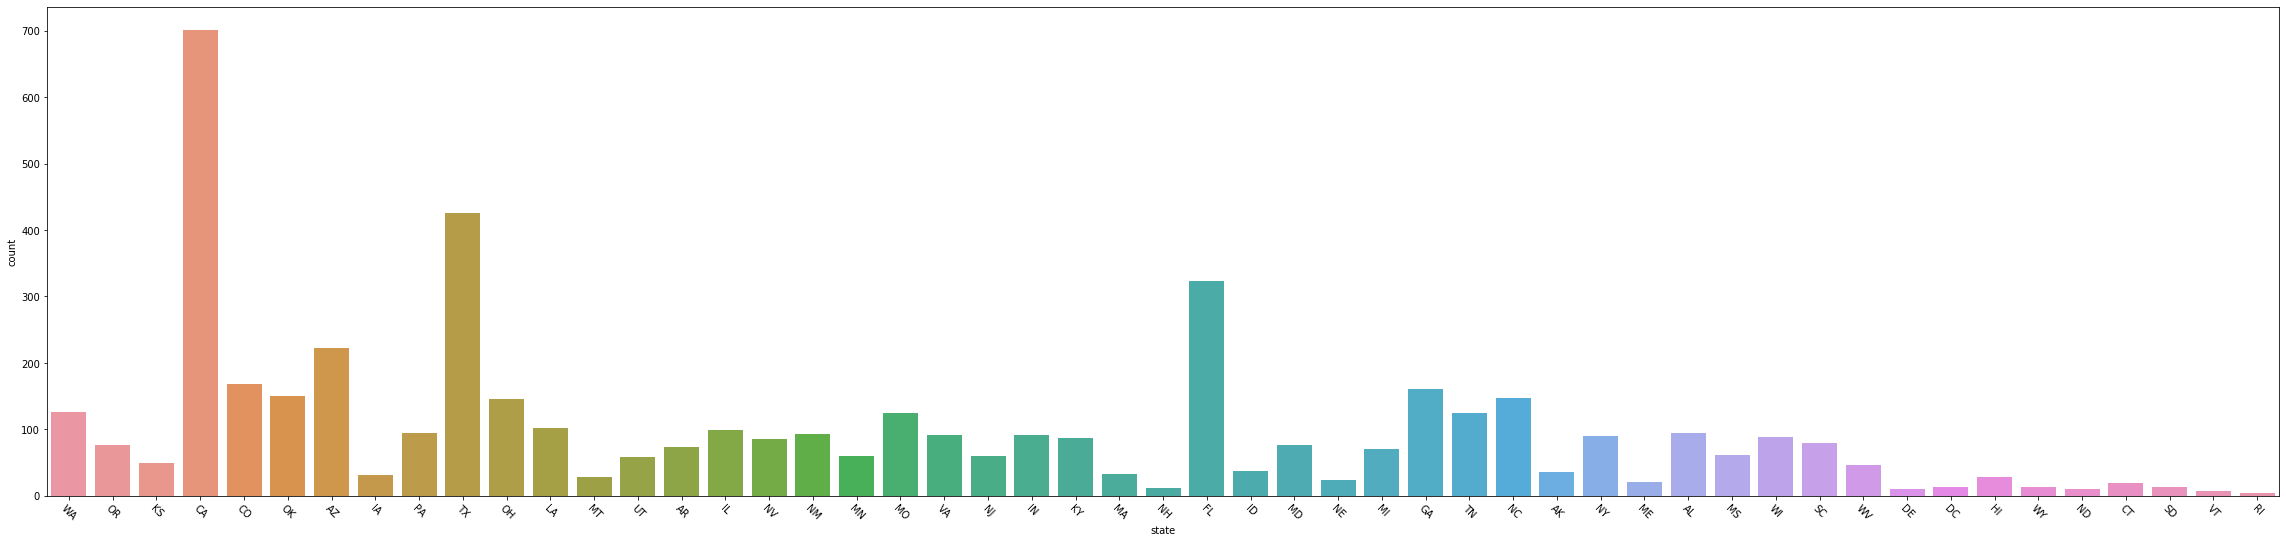

In [24]:
plt.figure(figsize=(40,9))
sns.countplot(df_us2['state'])
plt.xticks(rotation = -45)
plt.show()

We can spot that most of the death cases from the state CA

In [25]:
df_us2.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
arms_category              0
dtype: int64

### signs_of_mental_illness

In [26]:
df_us2['signs_of_mental_illness'].value_counts()

False    3792
True     1103
Name: signs_of_mental_illness, dtype: int64

Lets see this in the form of a pie chart to understand more easily

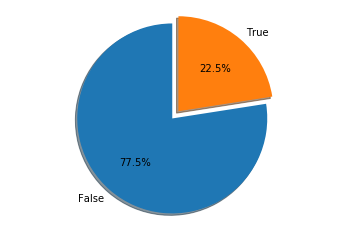

In [27]:
labels = df_us2['signs_of_mental_illness'].value_counts().index.tolist()
sizes = df_us2['signs_of_mental_illness'].value_counts()
explot = (0, 0.10)
fig, ax = plt.subplots()
ax.pie(sizes, labels = labels, explode = explot, autopct = "%1.1f%%", shadow=True, startangle=90)
ax.axis('equal')
plt.show()

We see that 77.5% of the cases didn't show signs of any mental illness

#### Lets see the signs_of_mental_illness wrt gender

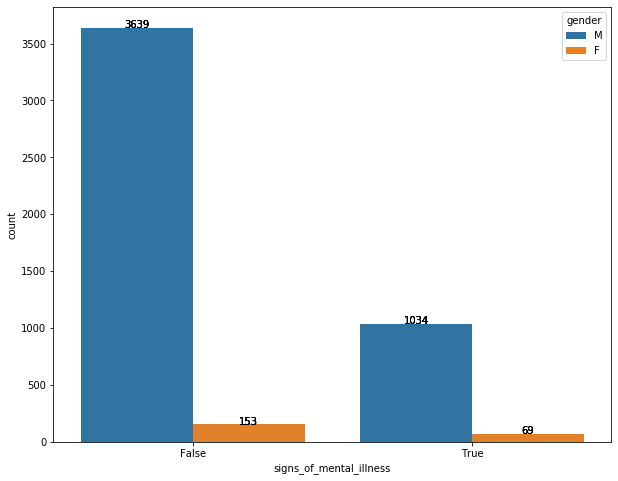

In [28]:
plt.figure(figsize=(10,8))
graph = sns.countplot(df_us2['signs_of_mental_illness'], hue = df_us2['gender'])
for p in graph.patches:
    for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.3,height ,ha="center")

#### Lets see the signs_of_mental_illness wrt race

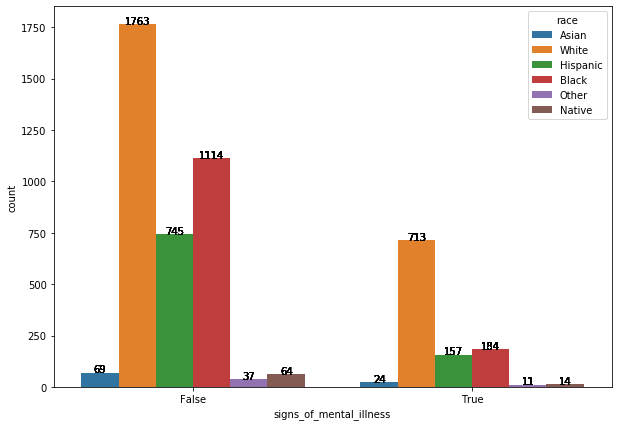

In [29]:
plt.figure(figsize=(10,7))
graph = sns.countplot(df_us2['signs_of_mental_illness'], hue = df_us2['race'])
for p in graph.patches:
    for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.3,height ,ha="center")

### threat_level

In [30]:
df_us2['threat_level'].value_counts()

attack          3160
other           1528
undetermined     207
Name: threat_level, dtype: int64

#### lets see this in the form of a countplot

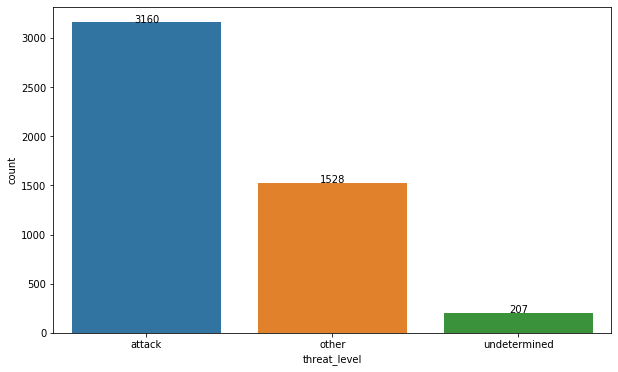

In [31]:
fig, ax = plt.subplots(figsize=(10,6))
countplot = sns.countplot(ax = ax, x = 'threat_level', data = df_us2)
i = 0
for p in countplot.patches:
    height = p.get_height()
    countplot.text(p.get_x() + p.get_width()/2.0, height + 0.1, height, ha = 'center')
    i +=1

#### Lets see threat_level wrt to gender

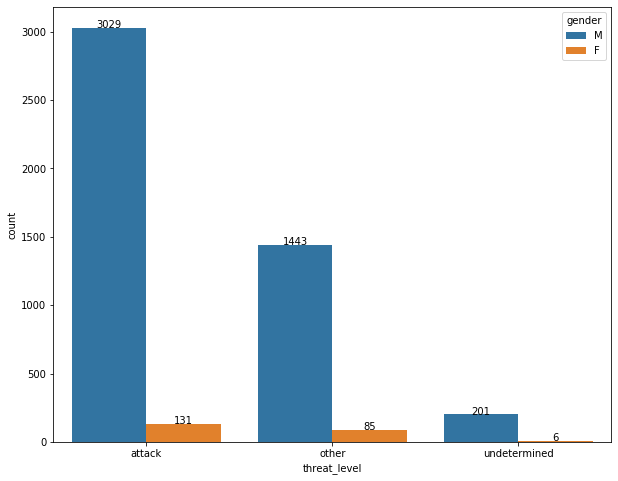

In [32]:
plt.figure(figsize=(10,8))
countplot = sns.countplot(df_us2['threat_level'], hue = df_us2['gender'])
i = 0
for p in countplot.patches:
    height = p.get_height()
    countplot.text(p.get_x() + p.get_width()/2.0, height + 0.1, height, ha = 'center')
    i +=1

### flee

In [33]:
df_us2['flee'].value_counts()

Not fleeing    3073
Car             820
Foot            642
Other           360
Name: flee, dtype: int64

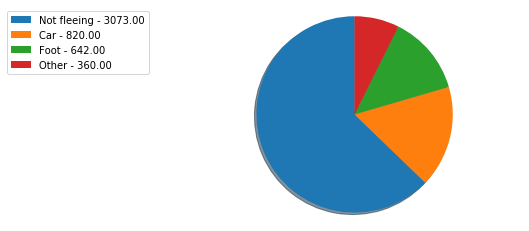

In [34]:
labels = df_us2['flee'].value_counts().index.tolist()
sizes = df_us2['flee'].value_counts()

fig, ax=plt.subplots()
patches, texts = ax.pie(sizes,shadow=True, startangle=90)

labels = ['{0} - {1:1.2f}'.format(i,j) for i, j in zip(labels,sizes)]
sort_legend = False

plt.legend(patches, labels, loc= 'best', bbox_to_anchor=(-0.1, 1.), fontsize = 10)
ax.axis('equal')
fig = plt.gcf()
plt.show()

We see that most people didn't flew away

#### Lets see flee wrt to gender

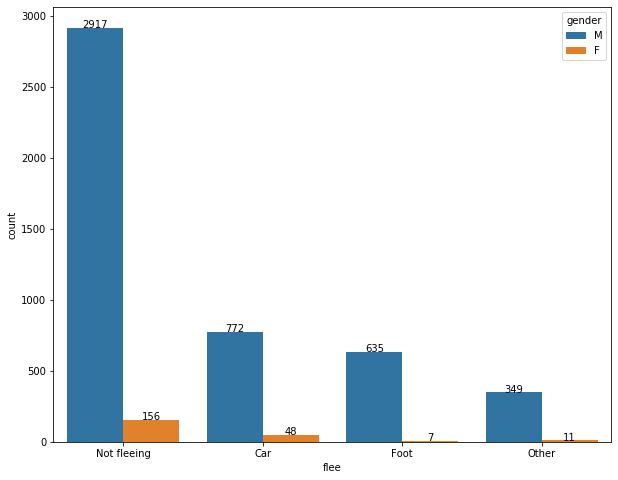

In [35]:
plt.figure(figsize=(10,8))
countplot = sns.countplot(df_us2['flee'], hue = df_us2['gender'])
i = 0
for p in countplot.patches:
    height = p.get_height()
    countplot.text(p.get_x() + p.get_width()/2.0, height + 0.1, height, ha = 'center')
    i +=1

### body_camera

In [36]:
df_us2['body_camera'].value_counts()

False    4317
True      578
Name: body_camera, dtype: int64

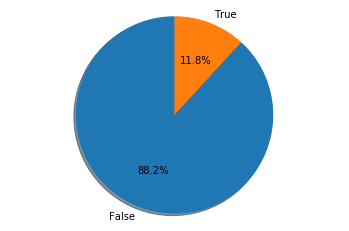

In [38]:
labels = df_us2['body_camera'].value_counts().index.tolist()
series = df_us2['body_camera'].value_counts()

plt.pie(series, labels = labels, autopct = "%1.1f%%", shadow=True, startangle=90)
plt.axis('equal')
plt.show()

We see that 88.2% of the police people present didn't wear body camera at the time of incident

### arms_category

In [39]:
df_us2['arms_category'].value_counts()

Guns                     2764
Sharp objects             818
Unknown                   418
Unarmed                   348
Other unusual objects     192
Blunt instruments         122
Vehicles                  121
Multiple                   54
Piercing objects           29
Electrical devices         24
Explosives                  4
Hand tools                  1
Name: arms_category, dtype: int64

#### lets see this in a countplot projection

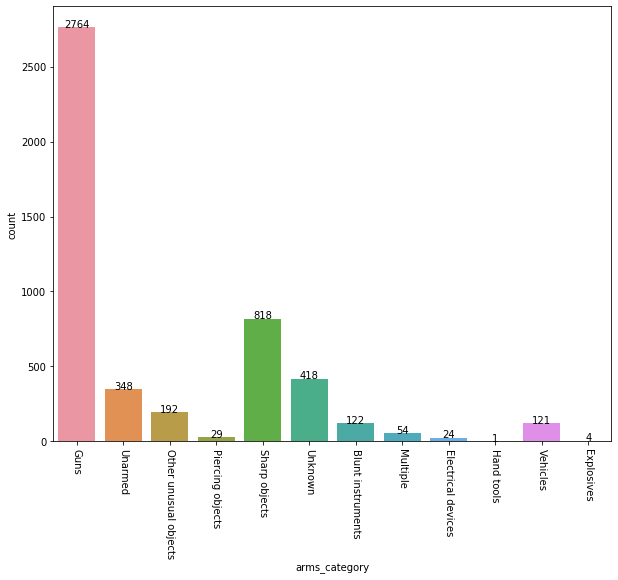

In [43]:
plt.figure(figsize=(10,8))
countplot = sns.countplot(df_us2['arms_category'])
i = 0
for p in countplot.patches:
    height = p.get_height()
    countplot.text(p.get_x() + p.get_width()/2.0, height + 0.1, height, ha = 'center')
    i +=1
plt.xticks(rotation = -90)
plt.show()

We see that mostly people were equipped with guns

#### Lets see arms_category wrt to gender

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


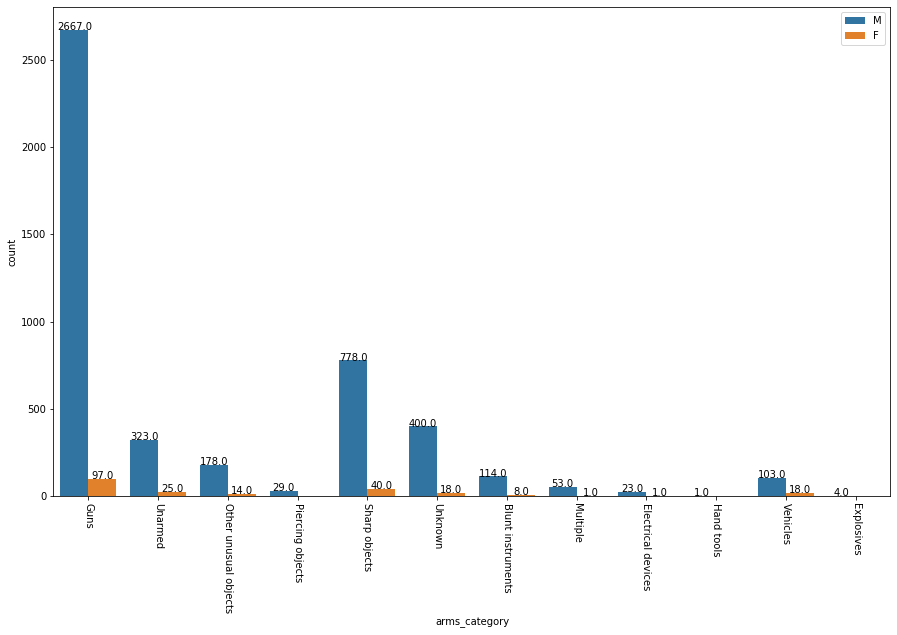

In [50]:
plt.figure(figsize=(15, 9))
countplot = sns.countplot(df_us2['arms_category'], hue = df_us2['gender'])
i = 0
for p in countplot.patches:
    height = p.get_height()
    countplot.text(p.get_x() + p.get_width()/2.0, height + 0.1, height, ha = 'center')
    i +=1
plt.xticks(rotation = -90)
plt.legend(loc = 'upper right')
plt.show()

We see that mostly men were the one with any sort of weapon. And in weapon, the mostly equipped is gun

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

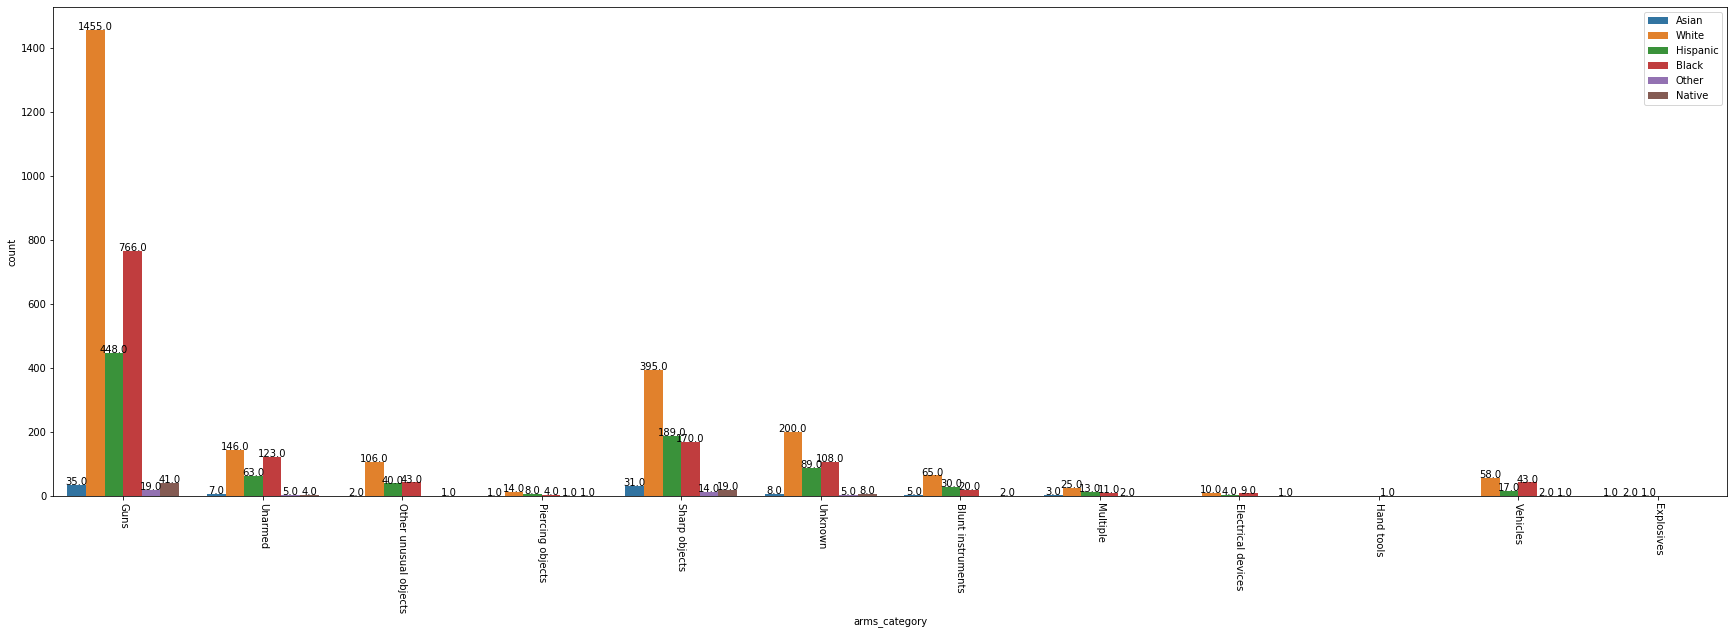

In [52]:
plt.figure(figsize=(30, 9))
countplot = sns.countplot(df_us2['arms_category'], hue = df_us2['race'])
i = 0
for p in countplot.patches:
    height = p.get_height()
    countplot.text(p.get_x() + p.get_width()/2.0, height + 0.1, height, ha = 'center')
    i +=1
plt.xticks(rotation = -90)
plt.legend(loc = 'upper right')
plt.show()

We can see that White People and Black people were the one who were mostly armed with guns